In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\LN&T\\train.csv")
test=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\LN&T\\test.csv")

In [3]:
train['age']=pd.to_datetime(train['Date.of.Birth'],format='%d-%m-%y')
train['age']=train['age'].apply(lambda X : 2019 - X.year)
train['age']=train['age'].apply(lambda x : x if x>0 else -x)

In [6]:
test['age']=pd.to_datetime(test['Date.of.Birth'],format='%d-%m-%y')
test['age']=test['age'].apply(lambda X : 2019 - X.year)
test['age']=test['age'].apply(lambda x : x if x>0 else -x)

In [7]:
trainfeature=train.dropna(axis=0)
trainfeature.drop("UniqueID",axis=1,inplace=True)
trainfeature.drop("Date.of.Birth",axis=1,inplace=True)

C:\Users\kaushik\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
trainfeature['AVERAGE.ACCT.AGE']=trainfeature['AVERAGE.ACCT.AGE'].str[:1]
trainfeature['AVERAGE.ACCT.AGE']=trainfeature['AVERAGE.ACCT.AGE'].astype(str).astype(int)

C:\Users\kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
trainfeature['CREDIT.HISTORY.LENGTH']=trainfeature['CREDIT.HISTORY.LENGTH'].str[:1].astype(int)

C:\Users\kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
trainfeature.drop('DisbursalDate',axis=1,inplace=True)

C:\Users\kaushik\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
trainfeature=pd.get_dummies(trainfeature,drop_first=True)

In [12]:
# Feature importance
import lightgbm as lgb
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(trainfeature.drop('loan_default',axis=1), trainfeature['loan_default'])
gbm.booster_.feature_importance()

array([176, 126, 280, 172, 167,  85, 365, 108, 205,   0,  13,  16,  29,
         3,   3, 151, 101,  35,  66,  83,  71,  64,   3,   0,   2,  16,
         3,   3, 136,   3,  19,  52,  51,  49,  78, 135,  50,   1,   2,
         4,   2,   1,   1,   5,   5,   4,   9,   1,  13,   0,   0,  12,
         4,   9,   2,   6])

In [13]:
fea_imp_ = pd.DataFrame({'cols':trainfeature.drop('loan_default',axis=1).columns, 'fea_imp':gbm.feature_importances_})
fea_imp_ =fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False).reset_index(drop=True)

In [14]:
import catboost as cb

In [15]:
cat_ind1 = [3,4,5,6,7,8]

In [16]:

cat_rg1 = cb.CatBoostRegressor(iterations=625, learning_rate=0.06, depth=8, l2_leaf_reg=10, loss_function='RMSE', random_seed=2018)

In [168]:
cat_rg1.fit(X=trainfeature.drop('loan_default',axis=1), y=trainfeature['loan_default'], cat_features=cat_ind1, verbose=True)

0:	learn: 0.4594024	total: 438ms	remaining: 4m 33s
1:	learn: 0.4535655	total: 648ms	remaining: 3m 21s
2:	learn: 0.4483832	total: 808ms	remaining: 2m 47s
3:	learn: 0.4436659	total: 1.05s	remaining: 2m 43s
4:	learn: 0.4394531	total: 1.26s	remaining: 2m 36s
5:	learn: 0.4356429	total: 1.51s	remaining: 2m 36s
6:	learn: 0.4322303	total: 1.76s	remaining: 2m 35s
7:	learn: 0.4291915	total: 2.02s	remaining: 2m 35s
8:	learn: 0.4264148	total: 2.27s	remaining: 2m 35s
9:	learn: 0.4240004	total: 2.57s	remaining: 2m 37s
10:	learn: 0.4218407	total: 2.85s	remaining: 2m 38s
11:	learn: 0.4198305	total: 3.12s	remaining: 2m 39s
12:	learn: 0.4180279	total: 3.38s	remaining: 2m 39s
13:	learn: 0.4164388	total: 3.64s	remaining: 2m 39s
14:	learn: 0.4150351	total: 3.88s	remaining: 2m 37s
15:	learn: 0.4137906	total: 4.14s	remaining: 2m 37s
16:	learn: 0.4126445	total: 4.44s	remaining: 2m 38s
17:	learn: 0.4116582	total: 4.64s	remaining: 2m 36s
18:	learn: 0.4106143	total: 4.91s	remaining: 2m 36s
19:	learn: 0.4097211	t

158:	learn: 0.3973842	total: 43.9s	remaining: 2m 8s
159:	learn: 0.3973613	total: 44.3s	remaining: 2m 8s
160:	learn: 0.3973549	total: 44.6s	remaining: 2m 8s
161:	learn: 0.3973449	total: 45s	remaining: 2m 8s
162:	learn: 0.3973337	total: 45.3s	remaining: 2m 8s
163:	learn: 0.3973190	total: 45.6s	remaining: 2m 8s
164:	learn: 0.3972917	total: 45.9s	remaining: 2m 7s
165:	learn: 0.3972723	total: 46.1s	remaining: 2m 7s
166:	learn: 0.3972604	total: 46.5s	remaining: 2m 7s
167:	learn: 0.3972394	total: 46.8s	remaining: 2m 7s
168:	learn: 0.3972270	total: 47.1s	remaining: 2m 7s
169:	learn: 0.3972126	total: 47.3s	remaining: 2m 6s
170:	learn: 0.3971935	total: 47.6s	remaining: 2m 6s
171:	learn: 0.3971672	total: 47.9s	remaining: 2m 6s
172:	learn: 0.3971563	total: 48.2s	remaining: 2m 5s
173:	learn: 0.3971334	total: 48.5s	remaining: 2m 5s
174:	learn: 0.3971079	total: 48.8s	remaining: 2m 5s
175:	learn: 0.3970865	total: 49.1s	remaining: 2m 5s
176:	learn: 0.3970663	total: 49.4s	remaining: 2m 4s
177:	learn: 0.

313:	learn: 0.3949049	total: 1m 31s	remaining: 1m 30s
314:	learn: 0.3948890	total: 1m 31s	remaining: 1m 29s
315:	learn: 0.3948730	total: 1m 31s	remaining: 1m 29s
316:	learn: 0.3948543	total: 1m 31s	remaining: 1m 29s
317:	learn: 0.3948423	total: 1m 32s	remaining: 1m 29s
318:	learn: 0.3948316	total: 1m 32s	remaining: 1m 28s
319:	learn: 0.3948258	total: 1m 32s	remaining: 1m 28s
320:	learn: 0.3948100	total: 1m 33s	remaining: 1m 28s
321:	learn: 0.3947940	total: 1m 33s	remaining: 1m 27s
322:	learn: 0.3947768	total: 1m 33s	remaining: 1m 27s
323:	learn: 0.3947662	total: 1m 33s	remaining: 1m 27s
324:	learn: 0.3947505	total: 1m 34s	remaining: 1m 26s
325:	learn: 0.3947407	total: 1m 34s	remaining: 1m 26s
326:	learn: 0.3947238	total: 1m 34s	remaining: 1m 26s
327:	learn: 0.3947075	total: 1m 35s	remaining: 1m 26s
328:	learn: 0.3947008	total: 1m 35s	remaining: 1m 25s
329:	learn: 0.3946846	total: 1m 35s	remaining: 1m 25s
330:	learn: 0.3946713	total: 1m 35s	remaining: 1m 25s
331:	learn: 0.3946591	total:

468:	learn: 0.3928014	total: 2m 18s	remaining: 46.1s
469:	learn: 0.3927951	total: 2m 18s	remaining: 45.8s
470:	learn: 0.3927893	total: 2m 19s	remaining: 45.5s
471:	learn: 0.3927805	total: 2m 19s	remaining: 45.2s
472:	learn: 0.3927774	total: 2m 19s	remaining: 44.9s
473:	learn: 0.3927712	total: 2m 19s	remaining: 44.6s
474:	learn: 0.3927629	total: 2m 20s	remaining: 44.3s
475:	learn: 0.3927407	total: 2m 20s	remaining: 44s
476:	learn: 0.3927298	total: 2m 20s	remaining: 43.7s
477:	learn: 0.3927172	total: 2m 21s	remaining: 43.4s
478:	learn: 0.3927026	total: 2m 21s	remaining: 43.1s
479:	learn: 0.3926859	total: 2m 21s	remaining: 42.8s
480:	learn: 0.3926654	total: 2m 22s	remaining: 42.5s
481:	learn: 0.3926559	total: 2m 22s	remaining: 42.2s
482:	learn: 0.3926449	total: 2m 22s	remaining: 41.9s
483:	learn: 0.3926320	total: 2m 22s	remaining: 41.6s
484:	learn: 0.3926161	total: 2m 23s	remaining: 41.3s
485:	learn: 0.3925950	total: 2m 23s	remaining: 41.1s
486:	learn: 0.3925804	total: 2m 23s	remaining: 4

624:	learn: 0.3909625	total: 3m 5s	remaining: 0us


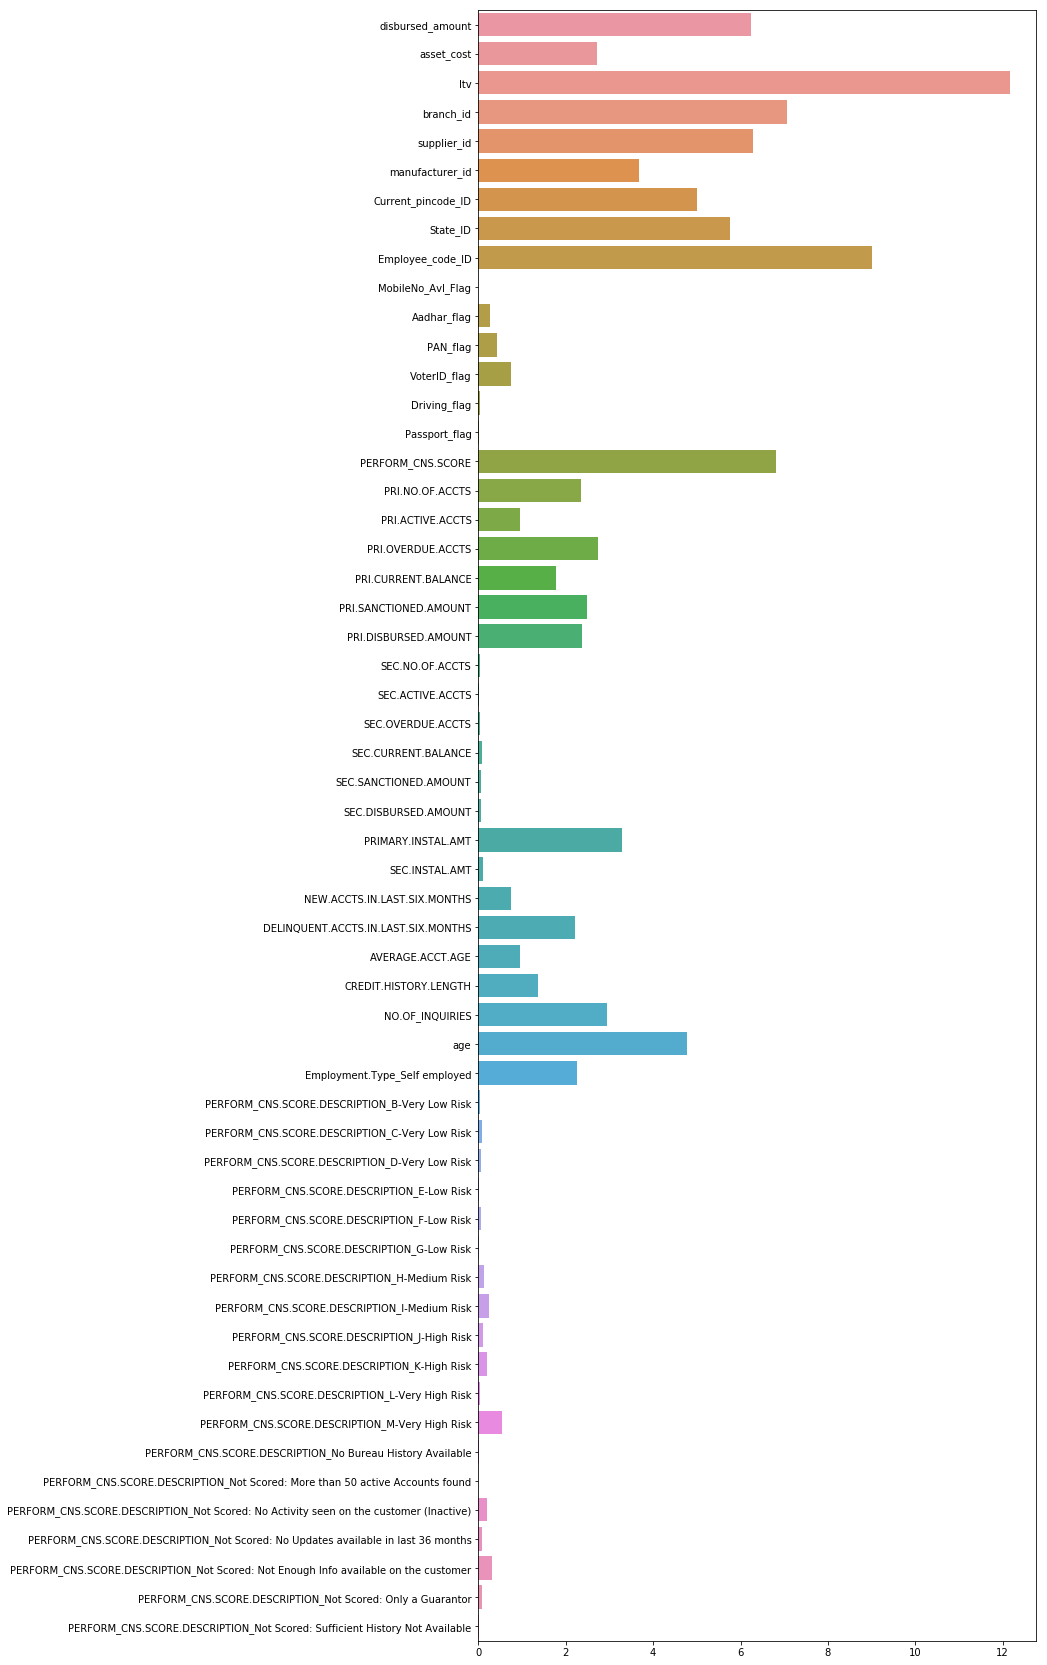

In [170]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(cat_rg1.feature_importances_, trainfeature.drop('loan_default',axis=1).columns, ax=ax)
plt.show()

In [171]:
fea_imp_cat_ = pd.DataFrame({'cols':trainfeature.drop('loan_default',axis=1).columns, 'fea_imp':cat_rg1.feature_importances_})
fea_imp_cat_ =fea_imp_cat_.loc[fea_imp_cat_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False).reset_index(drop=True)

In [17]:
trainfeature['Employee_code_ID'].nunique()

3269

C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


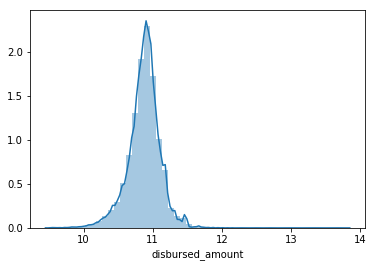

In [13]:
sns.distplot(np.log(trainfeature['disbursed_amount']))

In [14]:
np.log(trainfeature['disbursed_amount']).max()

13.80278391672554

In [15]:
np.log(trainfeature['disbursed_amount']).mean()

10.874437371536859

C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


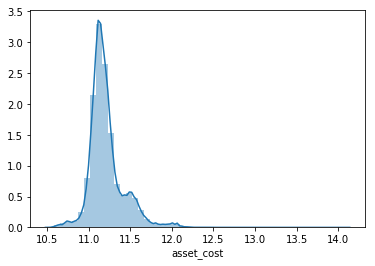

In [16]:
sns.distplot(np.log(trainfeature['asset_cost']))

C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


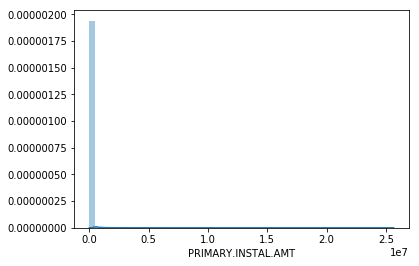

In [17]:
sns.distplot(trainfeature['PRIMARY.INSTAL.AMT'])

In [18]:
trainfeature[trainfeature['PRIMARY.INSTAL.AMT']<1].count()

disbursed_amount                                                                         153544
asset_cost                                                                               153544
ltv                                                                                      153544
branch_id                                                                                153544
supplier_id                                                                              153544
manufacturer_id                                                                          153544
Current_pincode_ID                                                                       153544
State_ID                                                                                 153544
Employee_code_ID                                                                         153544
MobileNo_Avl_Flag                                                                        153544
Aadhar_flag                             

In [19]:
trainfeature.loc[trainfeature['PRIMARY.INSTAL.AMT']>1,'PRIMARY.INSTAL.AMT']=1

In [20]:
trainfeature['PRIMARY.INSTAL.AMT'].unique()

array([0, 1], dtype=int64)

C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


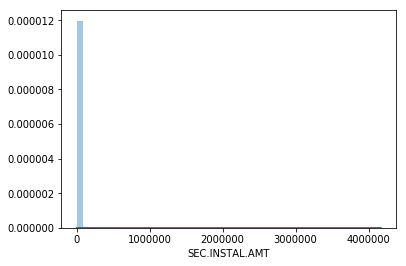

In [21]:
sns.distplot(trainfeature['SEC.INSTAL.AMT'])

In [22]:
trainfeature.loc[trainfeature['SEC.INSTAL.AMT']>1,'SEC.INSTAL.AMT']=1

In [23]:
trainfeature['Employment.Type_Self employed'].unique()

array([0, 1], dtype=uint64)

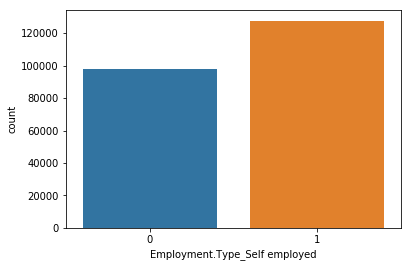

In [24]:
sns.countplot(trainfeature['Employment.Type_Self employed'])

C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


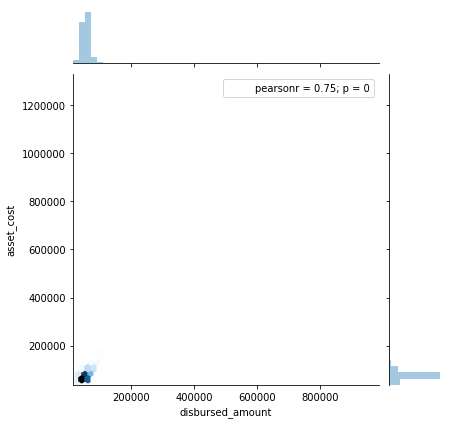

In [25]:
sns.jointplot(x='disbursed_amount',y='asset_cost',data=trainfeature,kind='hex')

In [26]:
trainfeature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 57 columns):
disbursed_amount                                                                         225493 non-null int64
asset_cost                                                                               225493 non-null int64
ltv                                                                                      225493 non-null float64
branch_id                                                                                225493 non-null int64
supplier_id                                                                              225493 non-null int64
manufacturer_id                                                                          225493 non-null int64
Current_pincode_ID                                                                       225493 non-null int64
State_ID                                                                                 225493 non-null int64

C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


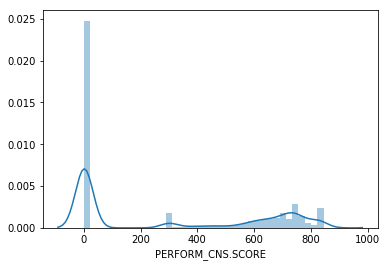

In [27]:
sns.distplot(trainfeature['PERFORM_CNS.SCORE'])

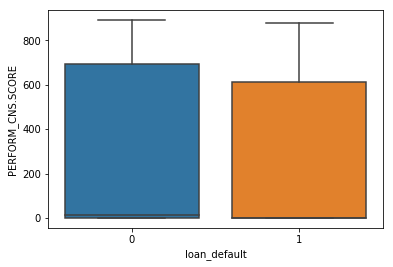

In [28]:
sns.boxplot(y='PERFORM_CNS.SCORE',x='loan_default',data=trainfeature)

In [39]:
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=0) & (trainfeature['PERFORM_CNS.SCORE']<200),'PERFORM_CNS.SCORE']=0

In [40]:
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=200) & (trainfeature['PERFORM_CNS.SCORE']<600),'PERFORM_CNS.SCORE']=1

In [41]:
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=600),'PERFORM_CNS.SCORE']=2

In [42]:
trainfeature['PERFORM_CNS.SCORE'].unique()

array([0, 1, 2], dtype=int64)

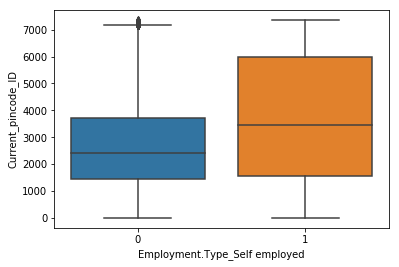

In [34]:
sns.boxplot(y='Current_pincode_ID',x='Employment.Type_Self employed',data=trainfeature)

In [35]:
trainfeature['no of proofs']=trainfeature['Aadhar_flag'] + trainfeature['PAN_flag'] + trainfeature['VoterID_flag'] + trainfeature['Driving_flag'] + trainfeature['Passport_flag']

In [36]:
trainfeature[trainfeature['no of proofs']<1]

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available,no of proofs


In [43]:
trainfeature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 57 columns):
disbursed_amount                                                                         225493 non-null int64
asset_cost                                                                               225493 non-null int64
ltv                                                                                      225493 non-null float64
branch_id                                                                                225493 non-null int64
supplier_id                                                                              225493 non-null int64
manufacturer_id                                                                          225493 non-null int64
Current_pincode_ID                                                                       225493 non-null int64
State_ID                                                                                 225493 non-null int64

In [ ]:
AVERAGE.ACCT.AG